In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import pandas as pd

In [0]:
# Define the dataset class for a custom dataset
class CustomDataset(Dataset):
    
    def __init__(self, data_frame, transform=None):
        self.data = data_frame
        self.transform = transform
#         
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        # load image as ndarray type (Height * Width * Channels)
        # be carefull for converting dtype to np.uint8 [Unsigned integer (0 to 255)]
        # in this example, i don't use ToTensor() method of torchvision.transforms
        # so you can convert numpy ndarray shape to tensor in PyTorch (H, W, C) --> (C, H, W)
        obs = self.data.iloc[index, 0 : 2].values
        label = self.data.iloc[index, 2]
        
        if self.transform is not None:
            obs = self.transform(obs)
            
        return obs, label

(-8, 8)

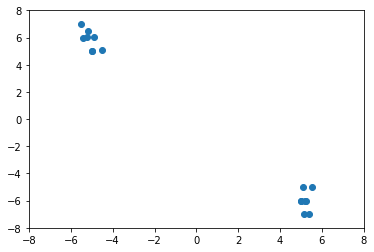

In [0]:
# Create the toy data
data_ = pd.DataFrame({'X1' : [-5, -5 ,-5.2, -5.4, -5.52, -4.89, -4.5, -5.222, 5, 5.1, 5.2, 5.4, 5.52, 5.155, 5.02, 5.222],
                   'X2' : [5, 5, 6.5, 6, 7.021, 6.03, 5.05, 6.016, -6, -5, -6.01, -7.011, -5.021, -7, -6.05, -6.016], 
                   'label' : [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]})
# Plot the toy data
plt.scatter(data_['X1'], data_['X2'])
plt.xlim(-8, 8)
plt.ylim(-8, 8)

In [0]:
train_dataset = CustomDataset(data_, transform = None)

In [0]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = 16, shuffle = True, num_workers = 2)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class linear_model(nn.Module):
  def __init__(self):
    super(linear_model, self).__init__()
    self.fc1 = nn.Linear(2, 1)
    self.fc2 = nn.Linear(2, 1)
#     self.fc3 = nn.Linear(2, 1)

  def forward(self, x):
    x = x.view(-1, 2)
    x1 = torch.sigmoid( self.fc1(x) )  
    x2 = torch.sigmoid( self.fc2(x) )  
#     x3 = torch.sigmoid( self.fc3(x) )  
    
    return x1, x2#, x3
  
model = linear_model()  

In [0]:
# #Script for generating fancy inner product matrix:

# sigma = 0.1 #HIGHER VALUES OF SIGMA SEEM TO PERFORM BETTER
# M = torch.zeros([2, 2])

# M_tensor = M.view(1,1,28,28)

# for i_1 in range(28):
#     for i_2 in range(28):
#         for j_1 in range(28):
#             for j_2 in range(28):
#                 M_tensor[i_1,i_2,j_1,j_2] = np.exp( -((i_1 - j_1)**2 + (i_2 - j_2)**2) / (2 * (sigma)**2) )

# M = M_tensor.view([28*28,28*28])

In [0]:
# Define loss function and optimizer
import torch.optim as optim

loss_function = nn.BCELoss(reduction = 'mean') # sums all outputs and divides by total data points

optimizer = optim.Adam(model.parameters(), lr = 0.01)

class custom_loss(torch.nn.Module):

  def __init__(self):
    super(custom_loss,self).__init__()

  def forward(self, mat1, mat2):
  # Absolute dot product of weights
    l = (torch.mm(mat1, mat2.t()))**2

  # Fancy dot product if weights
#     l = (torch.mm(mat1, torch.mm(M, mat2.t())))**2
    return l

sl = custom_loss()    

In [0]:
models_forloss = [model.fc1.weight, model.fc2.weight, model.fc3.weight, model.fc4.weight, model.fc5.weight, model.fc6.weight, model.fc7.weight, model.fc8.weight, 
      model.fc9.weight, model.fc10.weight, model.fc11.weight, model.fc12.weight, model.fc13.weight, model.fc14.weight, model.fc15.weight, model.fc16.weight]

In [0]:
n_epochs = 35
lmbda = 100

for epochs in range(n_epochs):
 
  running_loss = 0
  
  for batch in trainloader:
    data, targets = batch

    optimizer.zero_grad()

    output1, output2 = model(data.float())

    loss = loss_function(output1, targets.view(-1, 1).float()) + loss_function(output2, targets.view(-1, 1).float()) +  lmbda * sl.forward(model.fc1.weight, model.fc2.weight)#+ \
#     loss_function(output3, targets.view(-1, 1).float()) +  lmbda * sl.forward(model.fc1.weight, model.fc2.weight) + \
#     lmbda * sl.forward(model.fc2.weight, model.fc3.weight) + lmbda * sl.forward(model.fc1.weight, model.fc3.weight)

    #     for mm in range(1, len(models_forloss)):

    #       loss += loss_function(output[mm], targets.view(-1, 1).float())

    #     for fr in range((len(models_forloss) - 1)):

    #       for sn in range(fr + 1, len(models_forloss)):  

    #         loss += lmbda * sl.forward(models_forloss[fr], models_forloss[sn], M)[0][0]

    loss.backward()

    optimizer.step()

    running_loss += loss.item()
  print(running_loss)    

0.725413978099823
0.6361219882965088
0.5599660873413086
0.4969103932380676
0.4465537369251251
0.4080764651298523
0.38021203875541687
0.3612482249736786
0.34905847907066345
0.34119176864624023
0.33509162068367004
0.32846489548683167
0.3196795880794525
0.3079882860183716
0.29349446296691895
0.2769455313682556
0.25947368144989014
0.24234972894191742
0.22676163911819458
0.21361322700977325
0.20334497094154358
0.19581259787082672
0.1902894377708435
0.18565718829631805
0.18076220154762268
0.17479155957698822
0.16749797761440277
0.15920241177082062
0.1506214737892151
0.14260509610176086
0.13585934042930603
0.13071605563163757
0.12701503932476044
0.12416050583124161
0.12136377394199371


In [0]:
# Test performance on the entire test set
correct = 0
total = 0
with torch.no_grad():
  for data in trainloader:
    images, labels = data
    outputs = model(images.float())
#     _, predicted = torch.max(outputs, 1)
    predicted = outputs[1] > 0.5
#     predicted = predicted.view(predicted.size(0))
    total += labels.size(0)
    matches = 0
    for i in range(len(predicted)):
      if predicted[i].item() == labels[i].item():
        matches += 1
    correct += matches#(predicted == labels).sum().item()
  print('Accuracy of the network on the entire data set is : %d %%' %(100 * correct/ total))

Accuracy of the network on the entire data set is : 100 %


In [0]:
model.fc1.weight

Parameter containing:
tensor([[-0.0124,  0.4066]], requires_grad=True)

In [0]:
model.fc2.weight


Parameter containing:
tensor([[-0.7036, -0.0316]], requires_grad=True)

In [0]:
model.fc3.weight

Parameter containing:
tensor([[-0.0777,  0.1854]], requires_grad=True)

(-1, 1)

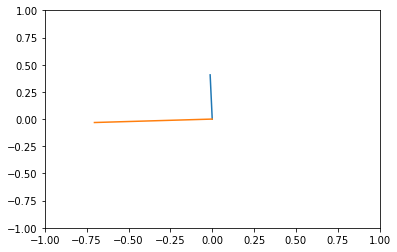

In [0]:
xx1 = [0, -0.0124]
yy1 = [0, 0.4066]
xx2 = [0, -0.7036]
yy2 = [0, -0.0316]
xx3 = [0, -0.0777]
yy3 = [0, 0.1854]

plt.plot(xx1, yy1)
plt.plot(xx2, yy2)
# plt.plot(xx3, yy3)

plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [0]:
sl(model.fc2.weight, model.fc1.weight)

tensor([[1.7107e-05]], grad_fn=<PowBackward0>)